# 3. Рекурентні нейронні мережі
Вирішіть задачу класифікації текстів (з якими ви працювали в лабораторній № 2) за допомогою рекурентної нейромережі двома способами:
а) навчить мережу і embedding шар з нуля (from scratch)
б) використовуючи pretrained word embeddings
 Результати порівняйте між собою і з одержаними раніш. 
Приклади:
https://github.com/natsakh/Data-Analysis/tree/main/Pr_7
https://keras.io/examples/nlp/text_classification_from_scratch/
https://keras.io/examples/nlp/bidirectional_lstm_imdb/
https://keras.io/examples/nlp/pretrained_word_embeddings/
* у деяких прикладах, з наведених вище, вирішується задача класифікації текстів за допомогою згорткових мереж, але вони можуть бути використані як приклад препроцесінга

а) навчить мережу і embedding шар з нуля (from scratch)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import pathlib
import os
import PIL
import PIL.Image
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, LSTM, Embedding, GlobalAveragePooling1D, GlobalAveragePooling2D
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split

2024-12-06 11:32:50.509428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733477570.535758   30211 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733477570.543033   30211 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-06 11:32:50.569476: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
data_train = []
with open("../Lab_2/archive/test.ft.txt", "rt") as file:
    for line in file:
        data_train.append(line.split(" ", 1))

df_train = pd.DataFrame(np.array(data_train), columns=['target', 'text'])

df_train.head()

,target,text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [4]:
data_test = []
with open("../Lab_2/archive/test.ft.txt", "rt") as file:
    for line in file:
        data_test.append(line.split(" ", 1))

df_test = pd.DataFrame(np.array(data_test), columns=['target', 'text'])

df_test.head()

,target,text
0,__label__2,Great CD: My lovely Pat has one of the GREAT v...
1,__label__2,One of the best game music soundtracks - for a...
2,__label__1,Batteries died within a year ...: I bought thi...
3,__label__2,"works fine, but Maha Energy is better: Check o..."
4,__label__2,Great for the non-audiophile: Reviewed quite a...


In [5]:
def target_to_numeric(df):
	for i in range(len(df)):
		if df.loc[i, "target"] == "__label__1":
			df.loc[i, "target"] = 0
		else:
			df.loc[i, "target"] = 1

target_to_numeric(df_train)
target_to_numeric(df_test)

In [6]:
texts = df_train["text"]
labels = df_train["target"]

In [7]:
max_words = 10000 # max number of words to use in the vocabulary
max_len = 100 # max length of each text (in terms of number of words)
embedding_dim = 100 # dimension of word embeddings
lstm_units = 64 # number of units in the LSTM layer
num_classes = 2 # number of classes

In [8]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [9]:
x = pad_sequences(sequences, maxlen=max_len)
y = keras.utils.to_categorical(labels, num_classes)

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length=max_len))
model.add(LSTM(lstm_units))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# history = model.fit(x, y, batch_size=32, epochs=12, validation_split=0.2)
history = model.fit(x, y, batch_size=32, epochs=12, validation_split=0.02)

/home/anna/Documents/Cur-Lec/Data-analysis-2024/Data-Analysis/.venv/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
2024-12-06 11:32:55.283410: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/12


4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 446ms/step - accuracy: 0.4608 - loss: 0.6935 - val_accuracy: 0.5000 - val_loss: 0.6940
Epoch 2/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 144ms/step - accuracy: 0.7491 - loss: 0.6800 - val_accuracy: 0.5000 - val_loss: 0.6975
Epoch 3/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.6539 - loss: 0.6614 - val_accuracy: 0.5000 - val_loss: 0.6994
Epoch 4/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.7673 - loss: 0.6313 - val_accuracy: 0.5000 - val_loss: 0.6963
Epoch 5/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 149ms/step - accuracy: 0.9659 - loss: 0.5770 - val_accuracy: 0.5000 - val_loss: 0.6340
Epoch 6/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 0.9123 - loss: 0.4629 - val_accuracy: 0.5000 - val_loss: 0.5940
Epoch 7/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 0.9596 - loss: 0.3375 - val_accuracy: 0.5000 - val_loss: 0.7362
Epoch 8/12
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 137ms/step - accuracy: 1.0000 - loss: 0.3139 - val_accuracy: 0.5000 - val_loss: 0.8070
Epo

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

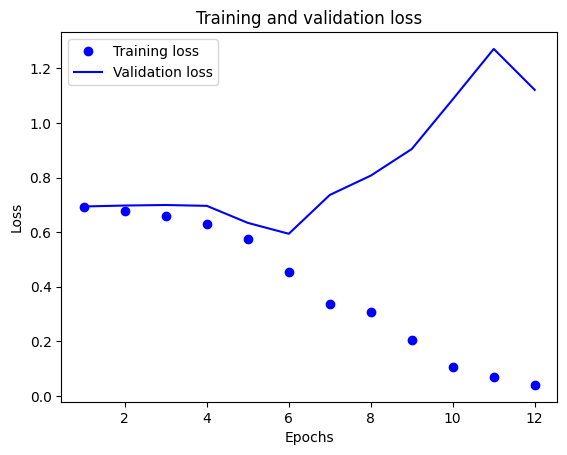

In [11]:
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [12]:
texts_train = df_test["text"]
labels_train = df_test["target"]

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences_train = tokenizer.texts_to_sequences(texts)


x_test = pad_sequences(sequences_train, maxlen=max_len)
y_test = keras.utils.to_categorical(labels_train, num_classes)

In [13]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04113602638244629
Test accuracy: 0.9900000095367432
